<a href="https://colab.research.google.com/github/Chen-Wi-Ki/IMU_Question_Analyze/blob/main/IMU_QA_Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 驗證某廠牌IMU飄移落差之QA問題(測試版)

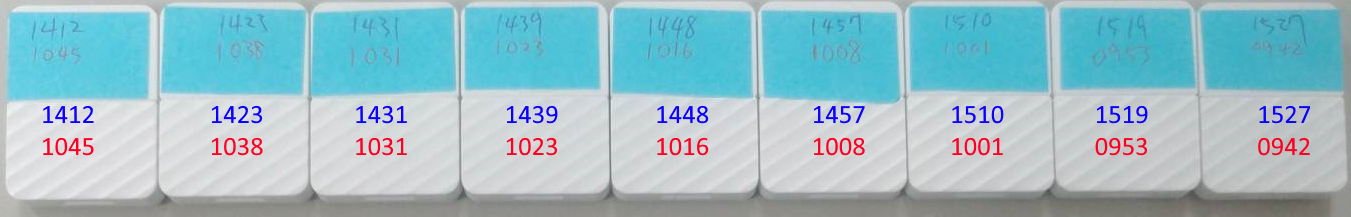

※編號依時間編序:藍色是7/8下午測的;紅色是7/12上午測的

※實驗方法:使用了對重力校正，每顆IMU重複水平旋轉100度，觀測約5分鐘左右每顆感測器單軸飄移訊號圖形吻合程度。

※本試驗用於單一系統QA問題,用意在挑選最優(或飄移量最相近)的5顆感測器。

[機械手臂測試影片7/8](https://drive.google.com/file/d/1NzAo1iacbFc-byWdNFRZfZxZmeTYtNr4/view?usp=sharing)

[機械手臂測試影片7/12](https://drive.google.com/file/d/17eZWQtBad1sF3yju8PpXuJF5l9GhVc9R/view?usp=sharing)

※兩者皆利用3D列印成型的制具使它傾斜45度角做量測，這跟IMU設計在PCB版上的位置有關,使它傾斜45度後某一軸數據會更能明顯可觀測。

※兩者差異在於7/8感測器正面朝手臂中心；7/12感測器背面朝手臂中心。

※當日測的第一顆會施測約5分30多秒的時間；其餘的約5分3秒左右，所以會有一顆波形訊號比其他顆多幾個波。

※此公開的測試版是為了快速制定量化IMU系統的QA方法並供人描述此QA原理之用，並基於它提出後續改進版方案。

In [2]:
from google.colab import drive
drive.mount('/content/gdrive' , force_remount=True)

Mounted at /content/gdrive


In [4]:
#BoosterMain資料夾與Data位置
!ls gdrive/MyDrive/ColabWorkspace/智復寶系統資料分析

BoosterMain.ipynb  Data


In [3]:
#Data一覽
!ls gdrive/MyDrive/ColabWorkspace/智復寶系統資料分析/Data

 0708手臂測試影片.mp4  '20220708(1457).csv'  '20220712(1008).csv'
 0712手臂測試影片.mp4  '20220708(1510).csv'  '20220712(1016).csv'
'20220708(1412).csv'   '20220708(1519).csv'  '20220712(1023).csv'
'20220708(1423).csv'   '20220708(1527).csv'  '20220712(1031).csv'
'20220708(1431).csv'   '20220712(0942).csv'  '20220712(1038).csv'
'20220708(1439).csv'   '20220712(0953).csv'  '20220712(1045).csv'
'20220708(1448).csv'   '20220712(1001).csv'


# 7/8測驗(傾45度,正面朝手臂中心)

In [ ]:
#動態訊號分析
import pandas as pd
usecols = ['Yaw', 'Pitch', 'Roll']
skiprows = 2

#data1412
data1412 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/智復寶系統資料分析/Data/20220708(1412).csv',skiprows=skiprows,usecols=usecols)
init_data1412 = data1412[0:1]
init_data1412['Yaw'] =init_data1412['Yaw'].astype(float)
init_data1412['Pitch'] =init_data1412['Pitch'].astype(float)
init_data1412['Roll'] =init_data1412['Roll'].astype(float)

calibration_data1412 = data1412[2:3]
calibration_data1412['Yaw'] =calibration_data1412['Yaw'].astype(float)
calibration_data1412['Pitch'] =calibration_data1412['Pitch'].astype(float)
calibration_data1412['Roll'] =calibration_data1412['Roll'].astype(float)

dynamic_data1412 = data1412[4:]
dynamic_data1412['Yaw'] =dynamic_data1412['Yaw'].astype(float)
dynamic_data1412['Pitch'] =dynamic_data1412['Pitch'].astype(float)
dynamic_data1412['Roll'] =dynamic_data1412['Roll'].astype(float)

#data1423
data1423 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/智復寶系統資料分析/Data/20220708(1423).csv',skiprows=skiprows,usecols=usecols)
init_data1423 = data1423[0:1]
init_data1423['Yaw'] =init_data1423['Yaw'].astype(float)
init_data1423['Pitch'] =init_data1423['Pitch'].astype(float)
init_data1423['Roll'] =init_data1423['Roll'].astype(float)

calibration_data1423 = data1423[2:3]
calibration_data1423['Yaw'] =calibration_data1423['Yaw'].astype(float)
calibration_data1423['Pitch'] =calibration_data1423['Pitch'].astype(float)
calibration_data1423['Roll'] =calibration_data1423['Roll'].astype(float)

dynamic_data1423 = data1423[4:]
dynamic_data1423['Yaw'] =dynamic_data1423['Yaw'].astype(float)
dynamic_data1423['Pitch'] =dynamic_data1423['Pitch'].astype(float)
dynamic_data1423['Roll'] =dynamic_data1423['Roll'].astype(float)

#data1431
data1431 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/智復寶系統資料分析/Data/20220708(1431).csv',skiprows=skiprows,usecols=usecols)
init_data1431 = data1431[0:1]
init_data1431['Yaw'] =init_data1431['Yaw'].astype(float)
init_data1431['Pitch'] =init_data1431['Pitch'].astype(float)
init_data1431['Roll'] =init_data1431['Roll'].astype(float)

calibration_data1431 = data1431[2:3]
calibration_data1431['Yaw'] =calibration_data1431['Yaw'].astype(float)
calibration_data1431['Pitch'] =calibration_data1431['Pitch'].astype(float)
calibration_data1431['Roll'] =calibration_data1431['Roll'].astype(float)

dynamic_data1431 = data1431[4:]
dynamic_data1431['Yaw'] =dynamic_data1431['Yaw'].astype(float)
dynamic_data1431['Pitch'] =dynamic_data1431['Pitch'].astype(float)
dynamic_data1431['Roll'] =dynamic_data1431['Roll'].astype(float)

#data1439
data1439 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/智復寶系統資料分析/Data/20220708(1439).csv',skiprows=skiprows,usecols=usecols)
init_data1439 = data1439[0:1]
init_data1439['Yaw'] =init_data1439['Yaw'].astype(float)
init_data1439['Pitch'] =init_data1439['Pitch'].astype(float)
init_data1439['Roll'] =init_data1439['Roll'].astype(float)

calibration_data1439 = data1439[2:3]
calibration_data1439['Yaw'] =calibration_data1439['Yaw'].astype(float)
calibration_data1439['Pitch'] =calibration_data1439['Pitch'].astype(float)
calibration_data1439['Roll'] =calibration_data1439['Roll'].astype(float)

dynamic_data1439 = data1439[4:]
dynamic_data1439['Yaw'] =dynamic_data1439['Yaw'].astype(float)
dynamic_data1439['Pitch'] =dynamic_data1439['Pitch'].astype(float)
dynamic_data1439['Roll'] =dynamic_data1439['Roll'].astype(float)

#data1448
data1448 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/智復寶系統資料分析/Data/20220708(1448).csv',skiprows=skiprows,usecols=usecols)
init_data1448 = data1448[0:1]
init_data1448['Yaw'] =init_data1448['Yaw'].astype(float)
init_data1448['Pitch'] =init_data1448['Pitch'].astype(float)
init_data1448['Roll'] =init_data1448['Roll'].astype(float)

calibration_data1448 = data1448[2:3]
calibration_data1448['Yaw'] =calibration_data1448['Yaw'].astype(float)
calibration_data1448['Pitch'] =calibration_data1448['Pitch'].astype(float)
calibration_data1448['Roll'] =calibration_data1448['Roll'].astype(float)

dynamic_data1448 = data1448[4:]
dynamic_data1448['Yaw'] =dynamic_data1448['Yaw'].astype(float)
dynamic_data1448['Pitch'] =dynamic_data1448['Pitch'].astype(float)
dynamic_data1448['Roll'] =dynamic_data1448['Roll'].astype(float)

#data1457
data1457 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/智復寶系統資料分析/Data/20220708(1457).csv',skiprows=skiprows,usecols=usecols)
init_data1457 = data1457[0:1]
init_data1457['Yaw'] =init_data1457['Yaw'].astype(float)
init_data1457['Pitch'] =init_data1457['Pitch'].astype(float)
init_data1457['Roll'] =init_data1457['Roll'].astype(float)

calibration_data1457 = data1457[2:3]
calibration_data1457['Yaw'] =calibration_data1457['Yaw'].astype(float)
calibration_data1457['Pitch'] =calibration_data1457['Pitch'].astype(float)
calibration_data1457['Roll'] =calibration_data1457['Roll'].astype(float)

dynamic_data1457 = data1457[4:]
dynamic_data1457['Yaw'] =dynamic_data1457['Yaw'].astype(float)
dynamic_data1457['Pitch'] =dynamic_data1457['Pitch'].astype(float)
dynamic_data1457['Roll'] =dynamic_data1457['Roll'].astype(float)

#data1510
data1510 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/智復寶系統資料分析/Data/20220708(1510).csv',skiprows=skiprows,usecols=usecols)
init_data1510 = data1510[0:1]
init_data1510['Yaw'] =init_data1510['Yaw'].astype(float)
init_data1510['Pitch'] =init_data1510['Pitch'].astype(float)
init_data1510['Roll'] =init_data1510['Roll'].astype(float)

calibration_data1510 = data1510[2:3]
calibration_data1510['Yaw'] =calibration_data1510['Yaw'].astype(float)
calibration_data1510['Pitch'] =calibration_data1510['Pitch'].astype(float)
calibration_data1510['Roll'] =calibration_data1510['Roll'].astype(float)

dynamic_data1510 = data1510[4:]
dynamic_data1510['Yaw'] =dynamic_data1510['Yaw'].astype(float)
dynamic_data1510['Pitch'] =dynamic_data1510['Pitch'].astype(float)
dynamic_data1510['Roll'] =dynamic_data1510['Roll'].astype(float)

#data1519
data1519 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/智復寶系統資料分析/Data/20220708(1519).csv',skiprows=skiprows,usecols=usecols)
init_data1519 = data1519[0:1]
init_data1519['Yaw'] =init_data1519['Yaw'].astype(float)
init_data1519['Pitch'] =init_data1519['Pitch'].astype(float)
init_data1519['Roll'] =init_data1519['Roll'].astype(float)

calibration_data1519 = data1519[2:3]
calibration_data1519['Yaw'] =calibration_data1519['Yaw'].astype(float)
calibration_data1519['Pitch'] =calibration_data1519['Pitch'].astype(float)
calibration_data1519['Roll'] =calibration_data1519['Roll'].astype(float)

dynamic_data1519 = data1519[4:]
dynamic_data1519['Yaw'] =dynamic_data1519['Yaw'].astype(float)
dynamic_data1519['Pitch'] =dynamic_data1519['Pitch'].astype(float)
dynamic_data1519['Roll'] =dynamic_data1519['Roll'].astype(float)

#data1527
data1527 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/智復寶系統資料分析/Data/20220708(1527).csv',skiprows=skiprows,usecols=usecols)
init_data1527 = data1527.iloc[0:1]
init_data1527['Yaw'] =init_data1527['Yaw'].astype(float)
init_data1527['Pitch'] =init_data1527['Pitch'].astype(float)
init_data1527['Roll'] =init_data1527['Roll'].astype(float)

calibration_data1527 = data1527.iloc[2:3]
calibration_data1527['Yaw'] =calibration_data1527['Yaw'].astype(float)
calibration_data1527['Pitch'] =calibration_data1527['Pitch'].astype(float)
calibration_data1527['Roll'] =calibration_data1527['Roll'].astype(float)

dynamic_data1527 = data1527.iloc[4:]
dynamic_data1527['Yaw'] =dynamic_data1527['Yaw'].astype(float)
dynamic_data1527['Pitch'] =dynamic_data1527['Pitch'].astype(float)
dynamic_data1527['Roll'] =dynamic_data1527['Roll'].astype(float)

Yaw/Pitch/Roll的初始分佈


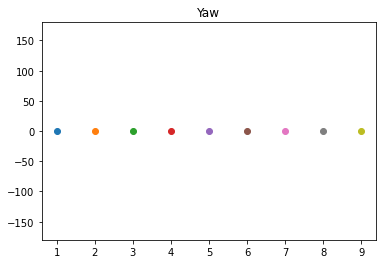

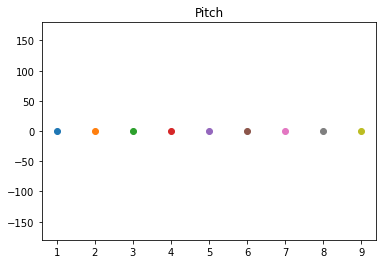

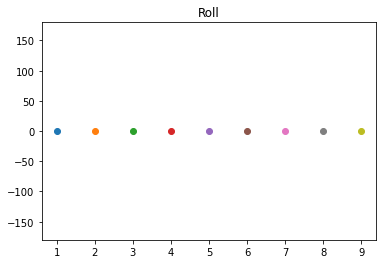

In [7]:
from matplotlib import pyplot as plt
print('Yaw/Pitch/Roll的初始分佈')
plt.scatter(1,init_data1412.Yaw)
plt.scatter(2,init_data1423.Yaw)
plt.scatter(3,init_data1431.Yaw)
plt.scatter(4,init_data1439.Yaw)
plt.scatter(5,init_data1448.Yaw)
plt.scatter(6,init_data1457.Yaw)
plt.scatter(7,init_data1510.Yaw)
plt.scatter(8,init_data1519.Yaw)
plt.scatter(9,init_data1527.Yaw)
plt.ylim(-180,180)
plt.title('Yaw')
plt.show()
plt.scatter(1,init_data1412.Pitch)
plt.scatter(2,init_data1423.Pitch)
plt.scatter(3,init_data1431.Pitch)
plt.scatter(4,init_data1439.Pitch)
plt.scatter(5,init_data1448.Pitch)
plt.scatter(6,init_data1457.Pitch)
plt.scatter(7,init_data1510.Pitch)
plt.scatter(8,init_data1519.Pitch)
plt.scatter(9,init_data1527.Pitch)
plt.ylim(-180,180)
plt.title('Pitch')
plt.show()
plt.scatter(1,init_data1412.Roll)
plt.scatter(2,init_data1423.Roll)
plt.scatter(3,init_data1431.Roll)
plt.scatter(4,init_data1439.Roll)
plt.scatter(5,init_data1448.Roll)
plt.scatter(6,init_data1457.Roll)
plt.scatter(7,init_data1510.Roll)
plt.scatter(8,init_data1519.Roll)
plt.scatter(9,init_data1527.Roll)
plt.ylim(-180,180)
plt.title('Roll')
plt.show()

Yaw/Pitch/Roll的校正分佈
2    126.9225
Name: Yaw, dtype: float64


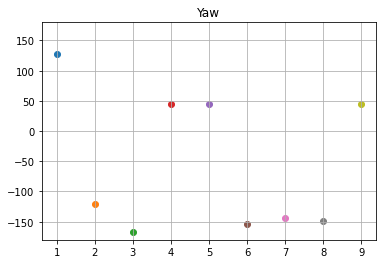

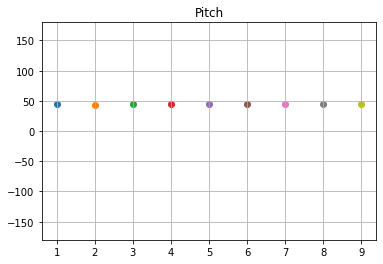

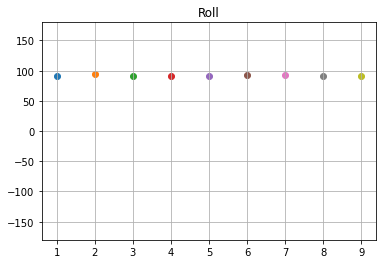

In [8]:
from matplotlib import pyplot as plt
print('Yaw/Pitch/Roll的校正分佈')
print(calibration_data1412.Yaw,)
plt.scatter(1,calibration_data1412.Yaw)
plt.scatter(2,calibration_data1423.Yaw)
plt.scatter(3,calibration_data1431.Yaw)
plt.scatter(4,calibration_data1439.Yaw)
plt.scatter(5,calibration_data1448.Yaw)
plt.scatter(6,calibration_data1457.Yaw)
plt.scatter(7,calibration_data1510.Yaw)
plt.scatter(8,calibration_data1519.Yaw)
plt.scatter(9,calibration_data1527.Yaw)
plt.title('Yaw')
plt.ylim(-180,180)
plt.grid()
plt.show()
plt.scatter(1,calibration_data1412.Pitch)
plt.scatter(2,calibration_data1423.Pitch)
plt.scatter(3,calibration_data1431.Pitch)
plt.scatter(4,calibration_data1439.Pitch)
plt.scatter(5,calibration_data1448.Pitch)
plt.scatter(6,calibration_data1457.Pitch)
plt.scatter(7,calibration_data1510.Pitch)
plt.scatter(8,calibration_data1519.Pitch)
plt.scatter(9,calibration_data1527.Pitch)
plt.title('Pitch')
plt.ylim(-180,180)
plt.grid()
plt.show()
plt.scatter(1,calibration_data1412.Roll)
plt.scatter(2,calibration_data1423.Roll)
plt.scatter(3,calibration_data1431.Roll)
plt.scatter(4,calibration_data1439.Roll)
plt.scatter(5,calibration_data1448.Roll)
plt.scatter(6,calibration_data1457.Roll)
plt.scatter(7,calibration_data1510.Roll)
plt.scatter(8,calibration_data1519.Roll)
plt.scatter(9,calibration_data1527.Roll)
plt.title('Roll')
plt.ylim(-180,180)
plt.grid()
plt.show()

## 小結1:Yaw的校正分佈有明顯落差

可能原因:推測這個跟演算法有關。

In [ ]:
#將每一個Yaw時序動態點扣除校正點
#print(dynamic_data1527)#測試
calibration_dynamic_data1412Yaw = dynamic_data1412.Yaw - calibration_data1412.Yaw[2]

#calibration_dynamic_data1423Yaw = dynamic_data1423.Yaw - calibration_data1423.Yaw[2]#有過-180,不可直接減,需如下調整
eulerSet = []
print(type(dynamic_data1423.Yaw))
for i in dynamic_data1423.Yaw:
  if i >=0:
    i=i-360
  eulerSet.append(i)
eulerSet_pdChange=pd.Series(eulerSet,index=dynamic_data1423.Yaw.index)
calibration_dynamic_data1423Yaw = eulerSet_pdChange - calibration_data1423.Yaw[2]

#calibration_dynamic_data1431Yaw = dynamic_data1431.Yaw - calibration_data1431.Yaw[2]#有過-180,不可直接減,需如下調整
eulerSet = []
for i in dynamic_data1431.Yaw:
  if i >=0:
    i=i-360
  eulerSet.append(i)
eulerSet_pdChange=pd.Series(eulerSet,index=dynamic_data1431.Yaw.index)
calibration_dynamic_data1431Yaw = eulerSet_pdChange - calibration_data1431.Yaw[2]


calibration_dynamic_data1439Yaw = dynamic_data1439.Yaw - calibration_data1439.Yaw[2]

calibration_dynamic_data1448Yaw = dynamic_data1448.Yaw - calibration_data1448.Yaw[2]

#calibration_dynamic_data1457Yaw = dynamic_data1457.Yaw - calibration_data1457.Yaw[2]#有過-180,不可直接減,需如下調整
eulerSet = []
for i in dynamic_data1457.Yaw:
  if i >=0:
    i=i-360
  eulerSet.append(i)
eulerSet_pdChange=pd.Series(eulerSet,index=dynamic_data1457.Yaw.index)
calibration_dynamic_data1457Yaw = eulerSet_pdChange - calibration_data1457.Yaw[2]
#calibration_dynamic_data1510Yaw = dynamic_data1510.Yaw - calibration_data1510.Yaw[2]#有過-180,不可直接減,需如下調整
eulerSet = []
for i in dynamic_data1510.Yaw:
  if i >=0:
    i=i-360
  eulerSet.append(i)
eulerSet_pdChange=pd.Series(eulerSet,index=dynamic_data1510.Yaw.index)
calibration_dynamic_data1510Yaw = eulerSet_pdChange - calibration_data1510.Yaw[2]
#calibration_dynamic_data1519Yaw = dynamic_data1519.Yaw - calibration_data1519.Yaw[2]#有過-180,不可直接減,需如下調整
eulerSet = []
for i in dynamic_data1519.Yaw:
  if i >=0:
    i=i-360
  eulerSet.append(i)
eulerSet_pdChange=pd.Series(eulerSet,index=dynamic_data1519.Yaw.index)
calibration_dynamic_data1519Yaw = eulerSet_pdChange - calibration_data1519.Yaw[2]

calibration_dynamic_data1527Yaw = dynamic_data1527.Yaw - calibration_data1527.Yaw[2]

Yaw的動態100度角旋轉數據


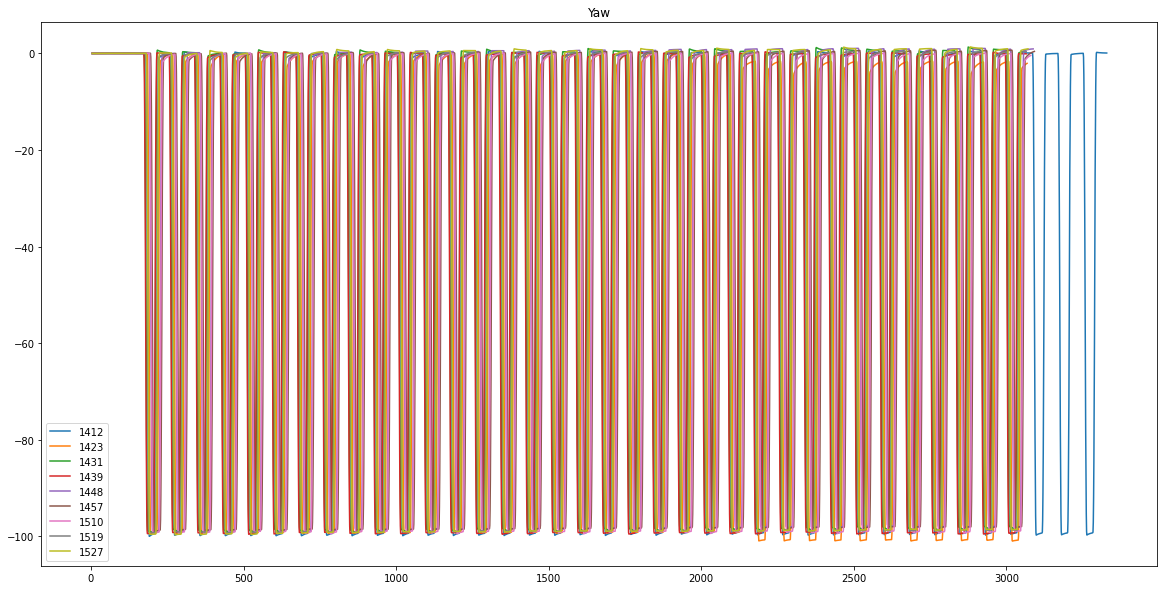

In [10]:
from matplotlib import pyplot as plt
print('Yaw的動態100度角旋轉數據')
mylabels = ['1412','1423','1431','1439','1448','1457','1510','1519','1527']
plt.figure(figsize=(20, 10))
plt.plot(calibration_dynamic_data1412Yaw,label = 1412)
plt.plot(calibration_dynamic_data1423Yaw,label = 1423)#飄移量相較其他更大
plt.plot(calibration_dynamic_data1431Yaw,label = 1431)
plt.plot(calibration_dynamic_data1439Yaw,label = 1439)
plt.plot(calibration_dynamic_data1448Yaw,label = 1448)
plt.plot(calibration_dynamic_data1457Yaw,label = 1457)
plt.plot(calibration_dynamic_data1510Yaw,label = 1510)
plt.plot(calibration_dynamic_data1519Yaw,label = 1519)
plt.plot(calibration_dynamic_data1527Yaw,label = 1527)
plt.legend()
plt.title('Yaw')

plt.show()

## 小結2:Sensor(1423)比其他感測器在2200點之後有明顯的具有下偏現象

可能原因1:機械手臂固定的制具偏移了,制具需要修改的更牢固(改進版會加強這點)。

可能原因2:感測器確實的出現了異常飄移現象。

# 7/12測驗(傾45度,背面朝手臂中心)

In [ ]:
#動態訊號分析
import pandas as pd
usecols = ['Yaw', 'Pitch', 'Roll']
skiprows = 2

#data1412
data1412 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/智復寶系統資料分析/Data/20220712(1045).csv',skiprows=skiprows,usecols=usecols)
init_data1412 = data1412[0:1]
init_data1412['Yaw'] =init_data1412['Yaw'].astype(float)
init_data1412['Pitch'] =init_data1412['Pitch'].astype(float)
init_data1412['Roll'] =init_data1412['Roll'].astype(float)

calibration_data1412 = data1412[2:3]
calibration_data1412['Yaw'] =calibration_data1412['Yaw'].astype(float)
calibration_data1412['Pitch'] =calibration_data1412['Pitch'].astype(float)
calibration_data1412['Roll'] =calibration_data1412['Roll'].astype(float)

dynamic_data1412 = data1412[4:]
dynamic_data1412['Yaw'] =dynamic_data1412['Yaw'].astype(float)
dynamic_data1412['Pitch'] =dynamic_data1412['Pitch'].astype(float)
dynamic_data1412['Roll'] =dynamic_data1412['Roll'].astype(float)

#data1423
data1423 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/智復寶系統資料分析/Data/20220712(1038).csv',skiprows=skiprows,usecols=usecols)
init_data1423 = data1423[0:1]
init_data1423['Yaw'] =init_data1423['Yaw'].astype(float)
init_data1423['Pitch'] =init_data1423['Pitch'].astype(float)
init_data1423['Roll'] =init_data1423['Roll'].astype(float)

calibration_data1423 = data1423[2:3]
calibration_data1423['Yaw'] =calibration_data1423['Yaw'].astype(float)
calibration_data1423['Pitch'] =calibration_data1423['Pitch'].astype(float)
calibration_data1423['Roll'] =calibration_data1423['Roll'].astype(float)

dynamic_data1423 = data1423[4:]
dynamic_data1423['Yaw'] =dynamic_data1423['Yaw'].astype(float)
dynamic_data1423['Pitch'] =dynamic_data1423['Pitch'].astype(float)
dynamic_data1423['Roll'] =dynamic_data1423['Roll'].astype(float)

#data1431
data1431 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/智復寶系統資料分析/Data/20220712(1031).csv',skiprows=skiprows,usecols=usecols)
init_data1431 = data1431[0:1]
init_data1431['Yaw'] =init_data1431['Yaw'].astype(float)
init_data1431['Pitch'] =init_data1431['Pitch'].astype(float)
init_data1431['Roll'] =init_data1431['Roll'].astype(float)

calibration_data1431 = data1431[2:3]
calibration_data1431['Yaw'] =calibration_data1431['Yaw'].astype(float)
calibration_data1431['Pitch'] =calibration_data1431['Pitch'].astype(float)
calibration_data1431['Roll'] =calibration_data1431['Roll'].astype(float)

dynamic_data1431 = data1431[4:]
dynamic_data1431['Yaw'] =dynamic_data1431['Yaw'].astype(float)
dynamic_data1431['Pitch'] =dynamic_data1431['Pitch'].astype(float)
dynamic_data1431['Roll'] =dynamic_data1431['Roll'].astype(float)

#data1439
data1439 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/智復寶系統資料分析/Data/20220712(1023).csv',skiprows=skiprows,usecols=usecols)
init_data1439 = data1439[0:1]
init_data1439['Yaw'] =init_data1439['Yaw'].astype(float)
init_data1439['Pitch'] =init_data1439['Pitch'].astype(float)
init_data1439['Roll'] =init_data1439['Roll'].astype(float)

calibration_data1439 = data1439[2:3]
calibration_data1439['Yaw'] =calibration_data1439['Yaw'].astype(float)
calibration_data1439['Pitch'] =calibration_data1439['Pitch'].astype(float)
calibration_data1439['Roll'] =calibration_data1439['Roll'].astype(float)

dynamic_data1439 = data1439[4:]
dynamic_data1439['Yaw'] =dynamic_data1439['Yaw'].astype(float)
dynamic_data1439['Pitch'] =dynamic_data1439['Pitch'].astype(float)
dynamic_data1439['Roll'] =dynamic_data1439['Roll'].astype(float)

#data1448
data1448 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/智復寶系統資料分析/Data/20220712(1016).csv',skiprows=skiprows,usecols=usecols)
init_data1448 = data1448[0:1]
init_data1448['Yaw'] =init_data1448['Yaw'].astype(float)
init_data1448['Pitch'] =init_data1448['Pitch'].astype(float)
init_data1448['Roll'] =init_data1448['Roll'].astype(float)

calibration_data1448 = data1448[2:3]
calibration_data1448['Yaw'] =calibration_data1448['Yaw'].astype(float)
calibration_data1448['Pitch'] =calibration_data1448['Pitch'].astype(float)
calibration_data1448['Roll'] =calibration_data1448['Roll'].astype(float)

dynamic_data1448 = data1448[4:]
dynamic_data1448['Yaw'] =dynamic_data1448['Yaw'].astype(float)
dynamic_data1448['Pitch'] =dynamic_data1448['Pitch'].astype(float)
dynamic_data1448['Roll'] =dynamic_data1448['Roll'].astype(float)

#data1457
data1457 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/智復寶系統資料分析/Data/20220712(1008).csv',skiprows=skiprows,usecols=usecols)
init_data1457 = data1457[0:1]
init_data1457['Yaw'] =init_data1457['Yaw'].astype(float)
init_data1457['Pitch'] =init_data1457['Pitch'].astype(float)
init_data1457['Roll'] =init_data1457['Roll'].astype(float)

calibration_data1457 = data1457[2:3]
calibration_data1457['Yaw'] =calibration_data1457['Yaw'].astype(float)
calibration_data1457['Pitch'] =calibration_data1457['Pitch'].astype(float)
calibration_data1457['Roll'] =calibration_data1457['Roll'].astype(float)

dynamic_data1457 = data1457[4:]
dynamic_data1457['Yaw'] =dynamic_data1457['Yaw'].astype(float)
dynamic_data1457['Pitch'] =dynamic_data1457['Pitch'].astype(float)
dynamic_data1457['Roll'] =dynamic_data1457['Roll'].astype(float)

#data1510
data1510 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/智復寶系統資料分析/Data/20220712(1001).csv',skiprows=skiprows,usecols=usecols)
init_data1510 = data1510[0:1]
init_data1510['Yaw'] =init_data1510['Yaw'].astype(float)
init_data1510['Pitch'] =init_data1510['Pitch'].astype(float)
init_data1510['Roll'] =init_data1510['Roll'].astype(float)

calibration_data1510 = data1510[2:3]
calibration_data1510['Yaw'] =calibration_data1510['Yaw'].astype(float)
calibration_data1510['Pitch'] =calibration_data1510['Pitch'].astype(float)
calibration_data1510['Roll'] =calibration_data1510['Roll'].astype(float)

dynamic_data1510 = data1510[4:]
dynamic_data1510['Yaw'] =dynamic_data1510['Yaw'].astype(float)
dynamic_data1510['Pitch'] =dynamic_data1510['Pitch'].astype(float)
dynamic_data1510['Roll'] =dynamic_data1510['Roll'].astype(float)

#data1519
data1519 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/智復寶系統資料分析/Data/20220712(0953).csv',skiprows=skiprows,usecols=usecols)
init_data1519 = data1519[0:1]
init_data1519['Yaw'] =init_data1519['Yaw'].astype(float)
init_data1519['Pitch'] =init_data1519['Pitch'].astype(float)
init_data1519['Roll'] =init_data1519['Roll'].astype(float)

calibration_data1519 = data1519[2:3]
calibration_data1519['Yaw'] =calibration_data1519['Yaw'].astype(float)
calibration_data1519['Pitch'] =calibration_data1519['Pitch'].astype(float)
calibration_data1519['Roll'] =calibration_data1519['Roll'].astype(float)

dynamic_data1519 = data1519[4:]
dynamic_data1519['Yaw'] =dynamic_data1519['Yaw'].astype(float)
dynamic_data1519['Pitch'] =dynamic_data1519['Pitch'].astype(float)
dynamic_data1519['Roll'] =dynamic_data1519['Roll'].astype(float)

#data1527
data1527 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/智復寶系統資料分析/Data/20220712(0942).csv',skiprows=skiprows,usecols=usecols)
init_data1527 = data1527.iloc[0:1]
init_data1527['Yaw'] =init_data1527['Yaw'].astype(float)
init_data1527['Pitch'] =init_data1527['Pitch'].astype(float)
init_data1527['Roll'] =init_data1527['Roll'].astype(float)

calibration_data1527 = data1527.iloc[2:3]
calibration_data1527['Yaw'] =calibration_data1527['Yaw'].astype(float)
calibration_data1527['Pitch'] =calibration_data1527['Pitch'].astype(float)
calibration_data1527['Roll'] =calibration_data1527['Roll'].astype(float)

dynamic_data1527 = data1527.iloc[4:]
dynamic_data1527['Yaw'] =dynamic_data1527['Yaw'].astype(float)
dynamic_data1527['Pitch'] =dynamic_data1527['Pitch'].astype(float)
dynamic_data1527['Roll'] =dynamic_data1527['Roll'].astype(float)

Yaw/Pitch/Roll的初始分佈


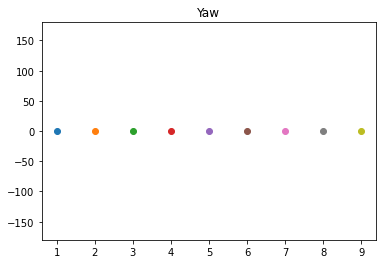

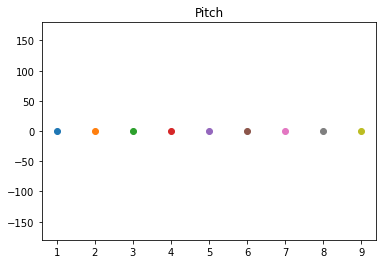

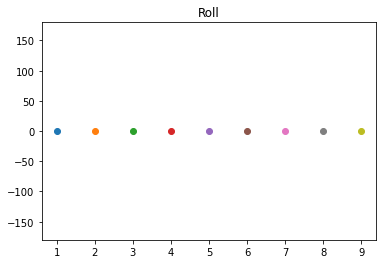

In [13]:
from matplotlib import pyplot as plt
print('Yaw/Pitch/Roll的初始分佈')
plt.scatter(1,init_data1412.Yaw)
plt.scatter(2,init_data1423.Yaw)
plt.scatter(3,init_data1431.Yaw)
plt.scatter(4,init_data1439.Yaw)
plt.scatter(5,init_data1448.Yaw)
plt.scatter(6,init_data1457.Yaw)
plt.scatter(7,init_data1510.Yaw)
plt.scatter(8,init_data1519.Yaw)
plt.scatter(9,init_data1527.Yaw)
plt.ylim(-180,180)
plt.title('Yaw')
plt.show()
plt.scatter(1,init_data1412.Pitch)
plt.scatter(2,init_data1423.Pitch)
plt.scatter(3,init_data1431.Pitch)
plt.scatter(4,init_data1439.Pitch)
plt.scatter(5,init_data1448.Pitch)
plt.scatter(6,init_data1457.Pitch)
plt.scatter(7,init_data1510.Pitch)
plt.scatter(8,init_data1519.Pitch)
plt.scatter(9,init_data1527.Pitch)
plt.ylim(-180,180)
plt.title('Pitch')
plt.show()
plt.scatter(1,init_data1412.Roll)
plt.scatter(2,init_data1423.Roll)
plt.scatter(3,init_data1431.Roll)
plt.scatter(4,init_data1439.Roll)
plt.scatter(5,init_data1448.Roll)
plt.scatter(6,init_data1457.Roll)
plt.scatter(7,init_data1510.Roll)
plt.scatter(8,init_data1519.Roll)
plt.scatter(9,init_data1527.Roll)
plt.ylim(-180,180)
plt.title('Roll')
plt.show()

Yaw/Pitch/Roll的校正分佈
2    62.99633
Name: Yaw, dtype: float64


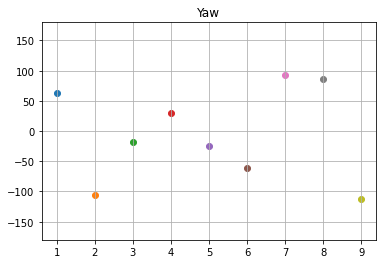

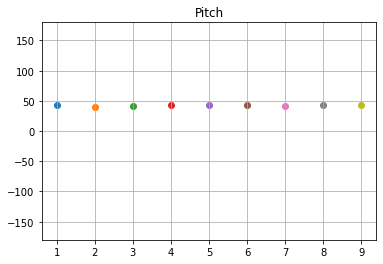

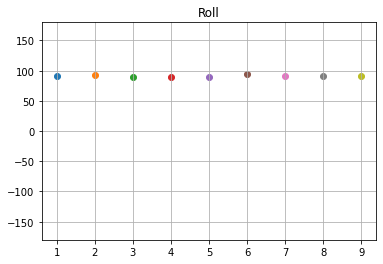

In [14]:
from matplotlib import pyplot as plt
print('Yaw/Pitch/Roll的校正分佈')
print(calibration_data1412.Yaw,)
plt.scatter(1,calibration_data1412.Yaw)
plt.scatter(2,calibration_data1423.Yaw)
plt.scatter(3,calibration_data1431.Yaw)
plt.scatter(4,calibration_data1439.Yaw)
plt.scatter(5,calibration_data1448.Yaw)
plt.scatter(6,calibration_data1457.Yaw)
plt.scatter(7,calibration_data1510.Yaw)
plt.scatter(8,calibration_data1519.Yaw)
plt.scatter(9,calibration_data1527.Yaw)
plt.title('Yaw')
plt.ylim(-180,180)
plt.grid()
plt.show()
plt.scatter(1,calibration_data1412.Pitch)
plt.scatter(2,calibration_data1423.Pitch)
plt.scatter(3,calibration_data1431.Pitch)
plt.scatter(4,calibration_data1439.Pitch)
plt.scatter(5,calibration_data1448.Pitch)
plt.scatter(6,calibration_data1457.Pitch)
plt.scatter(7,calibration_data1510.Pitch)
plt.scatter(8,calibration_data1519.Pitch)
plt.scatter(9,calibration_data1527.Pitch)
plt.title('Pitch')
plt.ylim(-180,180)
plt.grid()
plt.show()
plt.scatter(1,calibration_data1412.Roll)
plt.scatter(2,calibration_data1423.Roll)
plt.scatter(3,calibration_data1431.Roll)
plt.scatter(4,calibration_data1439.Roll)
plt.scatter(5,calibration_data1448.Roll)
plt.scatter(6,calibration_data1457.Roll)
plt.scatter(7,calibration_data1510.Roll)
plt.scatter(8,calibration_data1519.Roll)
plt.scatter(9,calibration_data1527.Roll)
plt.title('Roll')
plt.ylim(-180,180)
plt.grid()
plt.show()

## 小結1:Yaw的校正分佈還是有明顯落差

可能原因:推測這個跟演算法有關。

In [15]:
#動態角度變化校正(1423&1527需做歐拉轉換)
#將每一個Yaw時序動態點扣除校正點
#print(dynamic_data1527)#測試
calibration_dynamic_data1412Yaw = dynamic_data1412.Yaw - calibration_data1412.Yaw[2]

#calibration_dynamic_data1423Yaw = dynamic_data1423.Yaw - calibration_data1423.Yaw[2]#有過-180,不可直接減,需如下調整
eulerSet = []
for i in dynamic_data1423.Yaw:
  if i >=0:
    i=i-360
  eulerSet.append(i)
eulerSet_pdChange=pd.Series(eulerSet,index=dynamic_data1423.Yaw.index)
calibration_dynamic_data1423Yaw = eulerSet_pdChange - calibration_data1423.Yaw[2]


calibration_dynamic_data1431Yaw = dynamic_data1431.Yaw - calibration_data1431.Yaw[2]


calibration_dynamic_data1457Yaw = dynamic_data1457.Yaw - calibration_data1457.Yaw[2]

calibration_dynamic_data1510Yaw = dynamic_data1510.Yaw - calibration_data1510.Yaw[2]

calibration_dynamic_data1519Yaw = dynamic_data1519.Yaw - calibration_data1519.Yaw[2]

#calibration_dynamic_data1527Yaw = dynamic_data1527.Yaw - calibration_data1527.Yaw[2]#有過-180,不可直接減,需如下調整
eulerSet = []
for i in dynamic_data1527.Yaw:
  if i >=0:
    i=i-360
  eulerSet.append(i)
eulerSet_pdChange=pd.Series(eulerSet,index=dynamic_data1527.Yaw.index)
calibration_dynamic_data1527Yaw = eulerSet_pdChange - calibration_data1527.Yaw[2]



Yaw的動態100度角旋轉數據


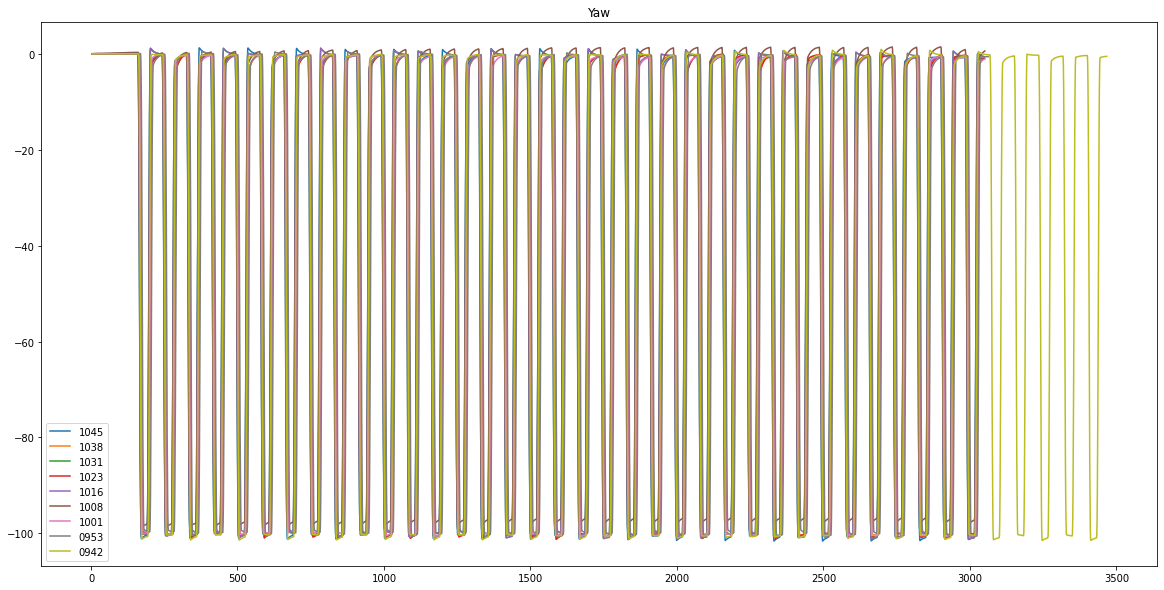

In [16]:
#動態角度變化(未校正時)
from matplotlib import pyplot as plt
print('Yaw的動態100度角旋轉數據')
plt.figure(figsize=(20, 10))
plt.plot(calibration_dynamic_data1412Yaw,label = '1045')
plt.plot(calibration_dynamic_data1423Yaw,label = '1038')
plt.plot(calibration_dynamic_data1431Yaw,label = '1031')
plt.plot(calibration_dynamic_data1423Yaw,label = '1023')
plt.plot(calibration_dynamic_data1431Yaw,label = '1016')
plt.plot(calibration_dynamic_data1457Yaw,label = '1008')#這個轉角相較其他sensor略為上偏
plt.plot(calibration_dynamic_data1510Yaw,label = '1001')
plt.plot(calibration_dynamic_data1519Yaw,label = '0953')
plt.plot(calibration_dynamic_data1527Yaw,label = '0942')
plt.legend()
plt.title('Yaw')

plt.show()

## 小結2:Sensor(1008)比其他感測器還要上偏

可能原因1:制具擺放歪了(改進版會再加強這點)

可能原因2:這顆感測器校正後相較其他顆更容易訊號上飄

# 其餘兩軸的數據(因難以觀測,所以意義並不大)

7/8其餘兩軸的動態100度角旋轉數據


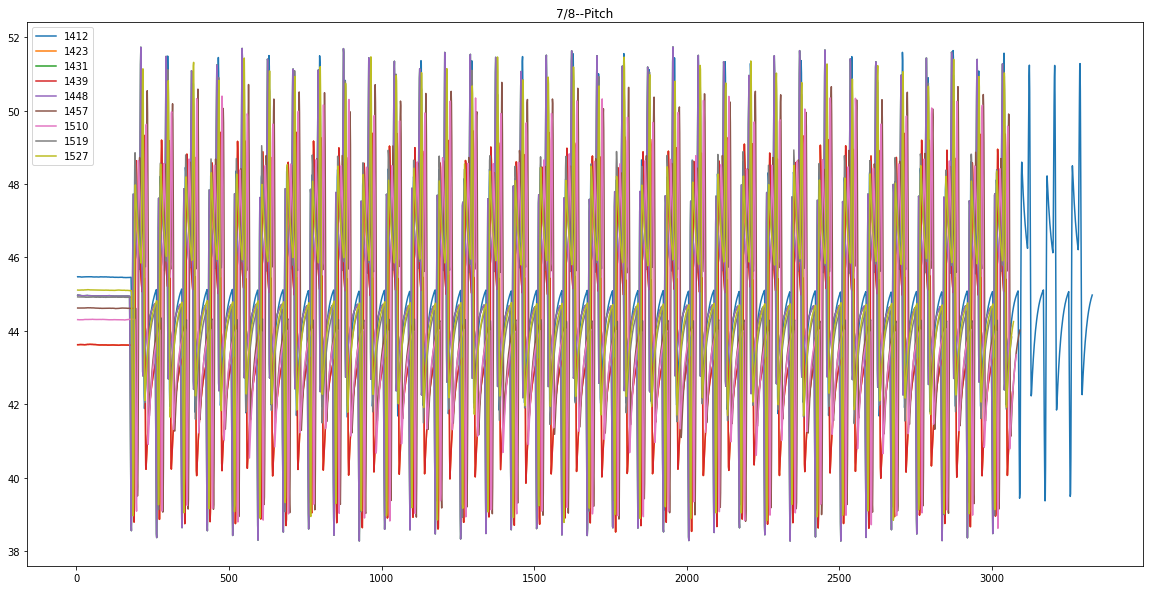

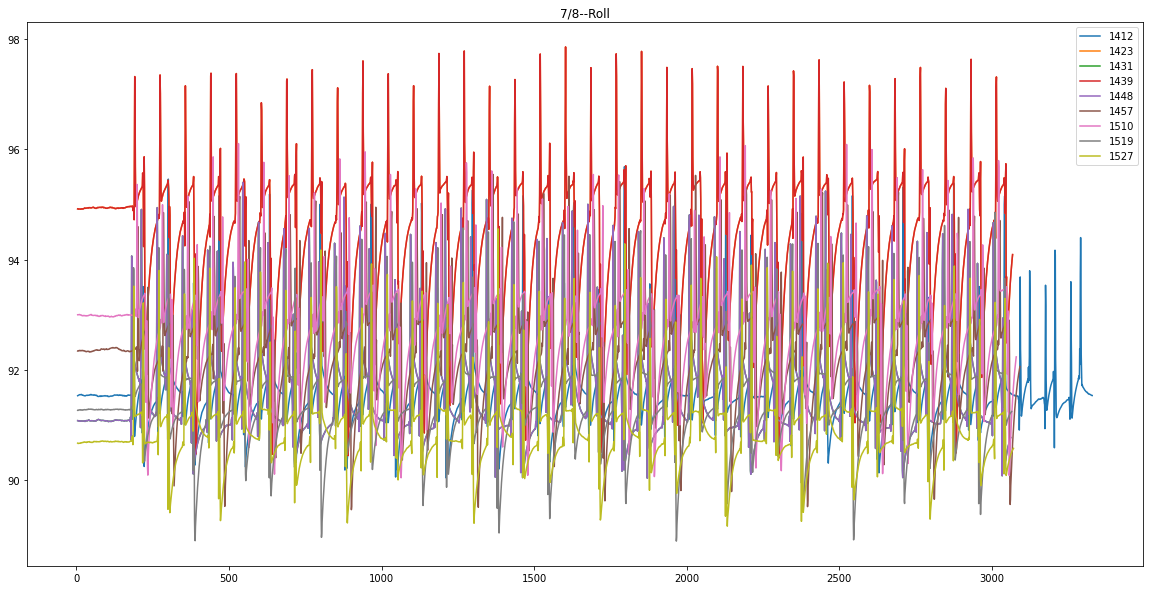

In [11]:
#動態角度變化(未校正時)
from matplotlib import pyplot as plt
print('7/8其餘兩軸的動態100度角旋轉數據')
plt.figure(figsize=(20, 10))
plt.plot(dynamic_data1412.Pitch,label = '1412')
plt.plot(dynamic_data1423.Pitch,label = '1423')
plt.plot(dynamic_data1431.Pitch,label = '1431')
plt.plot(dynamic_data1423.Pitch,label = '1439')
plt.plot(dynamic_data1431.Pitch,label = '1448')
plt.plot(dynamic_data1457.Pitch,label = '1457')
plt.plot(dynamic_data1510.Pitch,label = '1510')
plt.plot(dynamic_data1519.Pitch,label = '1519')
plt.plot(dynamic_data1527.Pitch,label = '1527')
plt.legend()
plt.title('7/8--Pitch')
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(dynamic_data1412.Roll,label = '1412')
plt.plot(dynamic_data1423.Roll,label = '1423')
plt.plot(dynamic_data1431.Roll,label = '1431')
plt.plot(dynamic_data1423.Roll,label = '1439')
plt.plot(dynamic_data1431.Roll,label = '1448')
plt.plot(dynamic_data1457.Roll,label = '1457')
plt.plot(dynamic_data1510.Roll,label = '1510')
plt.plot(dynamic_data1519.Roll,label = '1519')
plt.plot(dynamic_data1527.Roll,label = '1527')
plt.legend()
plt.title('7/8--Roll')
plt.show()

7/12其餘兩軸的動態100度角旋轉數據


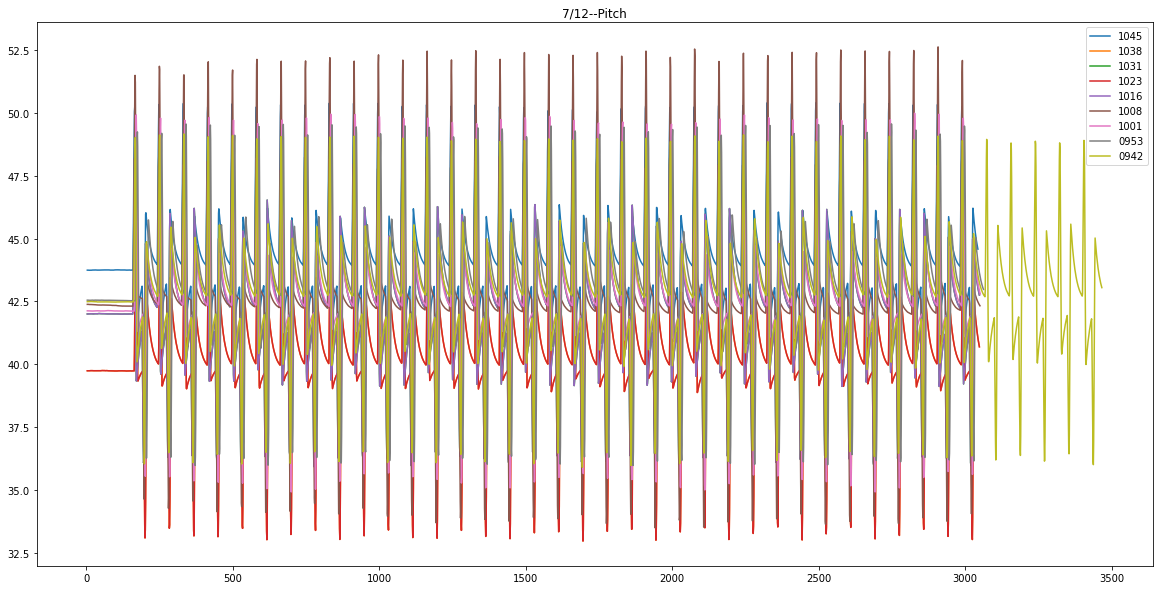

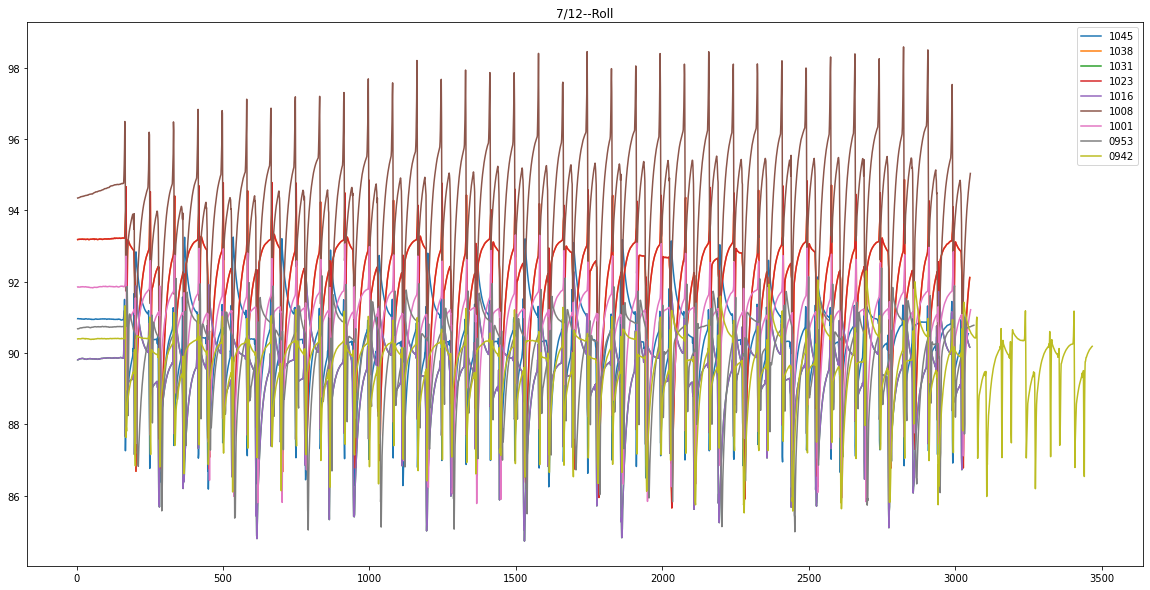

In [17]:
#動態角度變化(未校正時)
from matplotlib import pyplot as plt
print('7/12其餘兩軸的動態100度角旋轉數據')
plt.figure(figsize=(20, 10))
plt.plot(dynamic_data1412.Pitch,label = '1045')
plt.plot(dynamic_data1423.Pitch,label = '1038')
plt.plot(dynamic_data1431.Pitch,label = '1031')
plt.plot(dynamic_data1423.Pitch,label = '1023')
plt.plot(dynamic_data1431.Pitch,label = '1016')
plt.plot(dynamic_data1457.Pitch,label = '1008')
plt.plot(dynamic_data1510.Pitch,label = '1001')
plt.plot(dynamic_data1519.Pitch,label = '0953')
plt.plot(dynamic_data1527.Pitch,label = '0942')
plt.legend()
plt.title('7/12--Pitch')
plt.show()
plt.figure(figsize=(20, 10))
plt.plot(dynamic_data1412.Roll,label = '1045')
plt.plot(dynamic_data1423.Roll,label = '1038')
plt.plot(dynamic_data1431.Roll,label = '1031')
plt.plot(dynamic_data1423.Roll,label = '1023')
plt.plot(dynamic_data1431.Roll,label = '1016')
plt.plot(dynamic_data1457.Roll,label = '1008')
plt.plot(dynamic_data1510.Roll,label = '1001')
plt.plot(dynamic_data1519.Roll,label = '0953')
plt.plot(dynamic_data1527.Roll,label = '0942')
plt.legend()
plt.title('7/12--Roll')
plt.show()

## 小結:此數據雖難以觀測,但根據Pitch在起始旋轉點的觀測(0至250點間),7/8起始位移向上；與7/12起始位移向下可以解釋為何sensor擺放相差180度，然而Yaw數據的位移依然呈現0至-100度的旋轉數據。

# 總結1:制具需要再加強,才能更精確的釐清這個QA問題。但若排除上述實驗中(7/8-1423)與(7/12-1008)這兩顆數據，基本上所有感測器的Yaw波形變化差異性觀測起來並不算偏差太大。

# 總結2:通過制具原則上所有感測器採傾斜45度角的方式進行試驗，而在'校正分佈圖'Yaw軸具有很明顯的差異性，它因該也要會向其他兩軸一樣近似在某個值上下，而不是錯開如此大的校正角度，目前並不曉得為什麼會這樣？**根據這個結論，若挑選此軸校正值最相近的感測器**，也是種QA方法。

# 改進版應做的事...

1.改進制具

2.若數據差異性無法肉眼觀測,則會更進一步採用單一樣本T檢定法做分析

3.釐清校正數據Yaw軸為什麼差異如此大?目前推測是某種演算法造成的?但又為什麼要這麼設計？需要更進一步研究的

4.除了三軸角度變化,會另外針對四元素值進行其他QA分析

5.時間軸固定,目前時間軸並非完全同步開始,若可以同步開始觀測數據的辨識度會更好